In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
bd_data=[]
bv_data=[]
ba_data=[]
eq_data=[]
trainPaths=r"/content/drive/MyDrive/Major Project/New/Data/Training Datasets/OpenSees Datasets/dat2"
list1=os.listdir(trainPaths)
for filename in list1:
  if filename.startswith('.'):
    continue
  filepath=os.path.join(trainPaths,filename)
  for i in os.listdir(filepath):
    if i.startswith('DFree'):
      disp=np.genfromtxt(os.path.join(filepath,i),skip_header=10,usecols=(1,2,3,4,5,6))
      disp=disp[0:800,:]
      bd_data.append(disp)
    if i.startswith('VFree'):
      vel=np.genfromtxt(os.path.join(filepath,i),skip_header=10,usecols=(1,2,3,4,5,6))
      vel=vel[0:800,:]
      bv_data.append(vel)
    if i.startswith('AFree'):
      acel=np.genfromtxt(os.path.join(filepath,i),skip_header=10,usecols=(1,2,3,4,5,6))
      acel=acel[0:800,:]
      ba_data.append(acel)
EqPath=r"/content/drive/MyDrive/Major Project/New/Data/Earthquake Datasets/earth_quake2/EQ"
list2=os.listdir(EqPath)
for filename in list2:
  filepath=os.path.join(EqPath,filename)
  eq=np.genfromtxt(filepath)
  eq=eq[0:800,]
  eq_data.append(eq)

bd_data=np.array(bd_data)
bv_data=np.array(bv_data)
ba_data=np.array(ba_data)    
eq_data=np.array(eq_data)      
eq_data=eq_data.reshape(20,800,1)

In [8]:
print(f"Shape of displacement data loaded is\t\t {bd_data.shape}")
print(f"Shape of velocity data loaded is\t\t {bv_data.shape}")
print(f"Shape of accelaration data loaded is\t\t {ba_data.shape}")
print(f"Shape of ground accelaration data loaded is\t {eq_data.shape}")

Shape of displacement data loaded is		 (20, 800, 6)
Shape of velocity data loaded is		 (20, 800, 6)
Shape of accelaration data loaded is		 (20, 800, 6)
Shape of ground accelaration data loaded is	 (20, 800, 1)


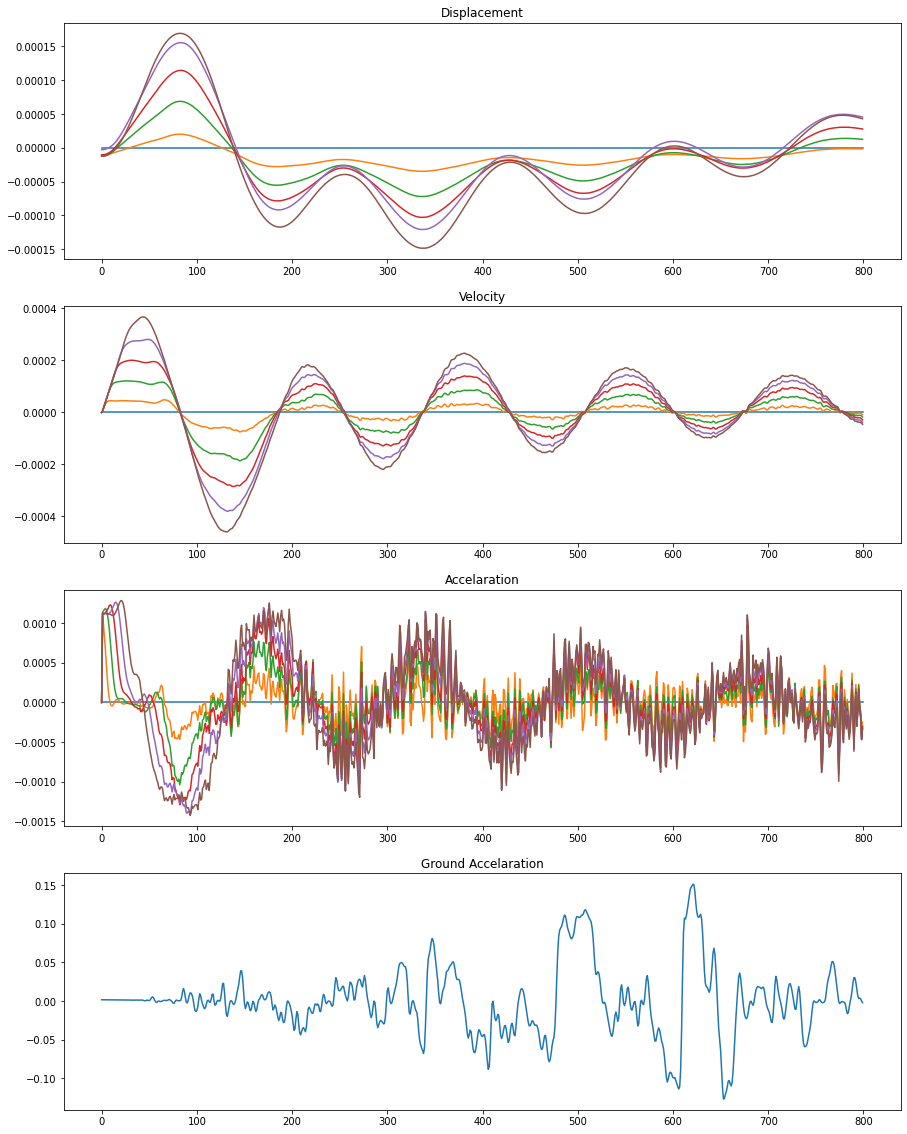

In [9]:
fig=plt.figure(figsize=(15,20))
ax1=plt.subplot(4,1,1)
ax1.set_title("Displacement")
ax1.plot(bd_data[1,:,:])
ax2=plt.subplot(4,1,2)
ax2.set_title("Velocity")
ax2.plot(bv_data[1,:,:])
ax3=plt.subplot(4,1,3)
ax3.set_title("Accelaration")
ax3.plot(ba_data[1,:,:])
ax4=plt.subplot(4,1,4)
ax4.set_title("Ground Accelaration")
ax4.plot(eq_data[1,:,:])
plt.show()